In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


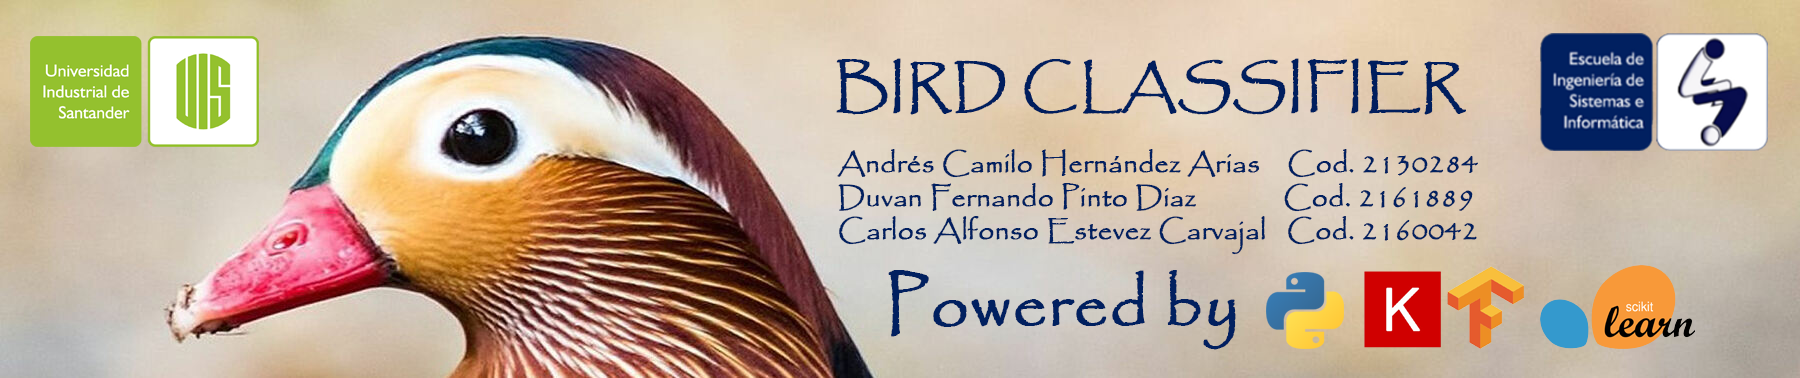

In [14]:
from IPython.display import Image 
Image('/content/drive/My Drive/IA Project/dataset-cover.png')

# **BIRD CLASSIFIER USING TENSORFLOW**

**LIBRERIAS**

In [4]:
import numpy as np 
import cv2
import os
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten, Dropout, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt

**SE CREA LA REN NEURONAL CONVOLUCIONAL**

In [5]:
#inicializamos la red neuronal 
clasificador = Sequential() 
clasificador.add(Conv2D(filters = 32, kernel_size = 3, strides = 3, input_shape = (100, 100, 3), activation = 'relu'))
clasificador.add(MaxPooling2D(pool_size = (2,2)))
clasificador.add(Conv2D(filters = 64, kernel_size = 2, strides = 2, activation = 'relu'))
clasificador.add(MaxPooling2D(pool_size = (2,2)))
clasificador.add(Flatten())
clasificador.add(Dense(units = 128, activation = 'relu'))
clasificador.add(Dropout(0.5))
clasificador.add(Dense(units = 210, activation = 'softmax'))

In [6]:
#compliación
clasificador.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
clasificador.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 33, 33, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

**SE CARGAN LOS DATOS Y SE HACE PREPROCESAMIENTO**

In [7]:
#se cargan los datos y se hace pre procesamiento
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        directory = '/content/drive/My Drive/IA Project/Data/Train',
        target_size=(100, 100),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        directory = '/content/drive/My Drive/IA Project/Data/Test',
        target_size=(100, 100),
        batch_size=32,
        class_mode='binary')

Found 28830 images belonging to 210 classes.
Found 1050 images belonging to 210 classes.


**ENTRENAMIENTO DE LA RED**

In [8]:
clasificador.fit(
        training_set,        
        epochs=15,
        validation_data=test_set,
        validation_steps = 1050,)

Epoch 1/15
901/901 [==============================] - 8548s 9s/step - loss: 5.1440 - accuracy: 0.0174 - val_loss: 4.6015 - val_accuracy: 0.0676
Epoch 2/15
901/901 [==============================] - 123s 137ms/step - loss: 4.4716 - accuracy: 0.0717
Epoch 3/15
901/901 [==============================] - 120s 133ms/step - loss: 4.0152 - accuracy: 0.1266
Epoch 4/15
901/901 [==============================] - 120s 133ms/step - loss: 3.7732 - accuracy: 0.1607
Epoch 5/15
901/901 [==============================] - 119s 133ms/step - loss: 3.6080 - accuracy: 0.1879
Epoch 6/15
901/901 [==============================] - 120s 133ms/step - loss: 3.4959 - accuracy: 0.2045
Epoch 7/15
901/901 [==============================] - 120s 133ms/step - loss: 3.4100 - accuracy: 0.2163
Epoch 8/15
901/901 [==============================] - 119s 132ms/step - loss: 3.3168 - accuracy: 0.2343
Epoch 9/15
901/901 [==============================] - 124s 137ms/step - loss: 3.2464 - accuracy: 0.2471
Epoch 10/15
901/901 [===

**RESULTADOS**

In [9]:
test_loss, test_acc = clasificador.evaluate(test_set)
print('Test accuracy:', test_acc)

33/33 [==============================] - 2s 68ms/step - loss: 1.9721 - accuracy: 0.5238
Test accuracy: 0.523809552192688


In [10]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model


def predict(file):
  x = load_img(file, target_size = (100, 100, 3))
  x = img_to_array(x)
  x = np.expand_dims(x, axis = 0)
  arreglo = clasificador.predict(x)
  resultado = arreglo[0]
  respuesta = np.argmax(resultado)
  if respuesta == 0:
    print('La imagen corresponde a un AFRICAN FIREFINCH')
  elif respuesta == 1:
    print('La imagen corresponde a un ALBATROS')
  elif respuesta == 2:
    print('La imagen corresponde a un ALEXANDRINE PARAKKET')
  elif respuesta == 3:
    print('La imagen corresponde a un AMERICAN AVOCET')
  elif respuesta == 4:
    print('La imagen corresponde a un AMERICAN BITTERN')
  elif respuesta == 5:
    print('La imagen corresponde a un AMERICAN COOT')
  elif respuesta == 6:
    print('La imagen corresponde a un AMERICAN GOLDFINCH')
  elif respuesta == 7:
    print('La imagen corresponde a un AMERICAN KESTREL')
  elif respuesta == 8:
    print('La imagen corresponde a un AMERICAN PIPIT')
  elif respuesta == 9:
    print('La imagen corresponde a un AMERICAN REDSTART')
  elif respuesta == 10:
    print('La imagen corresponde a un ANHINGA')
  elif respuesta == 11:
    print('La imagen corresponde a un ANNAS HUMMINGBIRD')
  elif respuesta == 12:
    print('La imagen corresponde a un ANTBIRD')
  elif respuesta == 13:
    print('La imagen corresponde a un ARARIPE MANAKIN')
  elif respuesta == 14:
    print('La imagen corresponde a un ASIAN CRESTED IBIS')
  elif respuesta == 15:
    print('La imagen corresponde a un BALD EAGLE')
  elif respuesta == 16:
    print('La imagen corresponde a un BALI STARLING')
  elif respuesta == 17:
    print('La imagen corresponde a un BALTIMORE ORIOLE')
  elif respuesta == 18:
    print('La imagen corresponde a un BANANAQUIT')
  elif respuesta == 19:
    print('La imagen corresponde a un BAR-TAILED GODWIT')
  elif respuesta == 20:
    print('La imagen corresponde a un BARN OWL')
  elif respuesta == 21:
    print('La imagen corresponde a un BARN SWALLOW')
  elif respuesta == 22:
    print('La imagen corresponde a un BAY-BREASTED WARBLER')
  elif respuesta == 23:
    print('La imagen corresponde a un BEARDED BARBET')
  elif respuesta == 24:
    print('La imagen corresponde a un BELTED KINGFISHER')
  elif respuesta == 25:
    print('La imagen corresponde a un BIRD OF PARADISE')
  elif respuesta == 26:
    print('La imagen corresponde a un BLACK FRANCOLIN')
  elif respuesta == 27:
    print('La imagen corresponde a un BLACK SKIMMER')
  elif respuesta == 28:
    print('La imagen corresponde a un BLACK SWAN')
  elif respuesta == 29:
    print('La imagen corresponde a un BLACK THROATED WARBLER')
  elif respuesta == 30:
    print('La imagen corresponde a un BLACK VULTURE')
  elif respuesta == 31:
    print('La imagen corresponde a un BLACK-CAPPED CHICKADEE')
  elif respuesta == 32:
    print('La imagen corresponde a un BLACK-NECKED GREBE')
  elif respuesta == 33:
    print('La imagen corresponde a un BLACK-THROATED SPARROW')
  elif respuesta == 34:
    print('La imagen corresponde a un BLACKBURNIAM WARBLER')
  elif respuesta == 35:
    print('La imagen corresponde a un BLUE GROUSE')
  elif respuesta == 36:
    print('La imagen corresponde a un BLUE HERON')
  elif respuesta == 37:
    print('La imagen corresponde a un BOBOLINK')
  elif respuesta == 38:
    print('La imagen corresponde a un BROWN NOODY')
  elif respuesta == 39:
    print('La imagen corresponde a un BROWN THRASHER')
  elif respuesta == 40:
    print('La imagen corresponde a un CACTUS WREN')
  elif respuesta == 41:
    print('La imagen corresponde a un CALIFORNIA CONDOR')
  elif respuesta == 42:
    print('La imagen corresponde a un CALIFORNIA GULL')
  elif respuesta == 43:
    print('La imagen corresponde a un CALIFORNIA QUAIL')
  elif respuesta == 44:
    print('La imagen corresponde a un CANARY')
  elif respuesta == 45:
    print('La imagen corresponde a un CAPE MAY WARBLER')
  elif respuesta == 46:
    print('La imagen corresponde a un CAPUCHINBIRD')
  elif respuesta == 47:
    print('La imagen corresponde a un CARMINE BEE-EATER')
  elif respuesta == 48:
    print('La imagen corresponde a un CASPIAN TERN')
  elif respuesta == 49:
    print('La imagen corresponde a un CASSOWARY')
  elif respuesta == 50:
    print('La imagen corresponde a un CHARA DE COLLAR')
  elif respuesta == 51:
    print('La imagen corresponde a un CHIPPING SPARROW')
  elif respuesta == 52:
    print('La imagen corresponde a un CINNAMON TEAL')
  elif respuesta == 53:
    print('La imagen corresponde a un COCK OF THE ROCK')
  elif respuesta == 54:
    print('La imagen corresponde a un COCKATOO')
  elif respuesta == 55:
    print('La imagen corresponde a un COMMON GRACKLE')
  elif respuesta == 56:
    print('La imagen corresponde a un COMMON HOUSE MARTIN')
  elif respuesta == 57:
    print('La imagen corresponde a un COMMON LOON')
  elif respuesta == 58:
    print('La imagen corresponde a un COMMON POORWILL')
  elif respuesta == 59:
    print('La imagen corresponde a un COMMON STARLING')
  elif respuesta == 60:
    print('La imagen corresponde a un COUCHS KINGBIRD')
  elif respuesta == 61:
    print('La imagen corresponde a un CRESTED AUKLET')
  elif respuesta == 62:
    print('La imagen corresponde a un CRESTED CARACARA')
  elif respuesta == 63:
    print('La imagen corresponde a un CROW')
  elif respuesta == 64:
    print('La imagen corresponde a un CROWNED PIGEON')
  elif respuesta == 65:
    print('La imagen corresponde a un CUBAN TODY')
  elif respuesta == 66:
    print('La imagen corresponde a un CURL CRESTED ARACURI')
  elif respuesta == 67:
    print('La imagen corresponde a un D-ARNAUDS BARBET')
  elif respuesta == 68:
    print('La imagen corresponde a un DARK EYED JUNCO')
  elif respuesta == 69:
    print('La imagen corresponde a un DOWNY WOODPECKER')
  elif respuesta == 70:
    print('La imagen corresponde a un EASTERN BLUEBIRD')
  elif respuesta == 71:
    print('La imagen corresponde a un EASTERN MEADOWLARK')
  elif respuesta == 72:
    print('La imagen corresponde a un EASTERN ROSELLA')
  elif respuesta == 73:
    print('La imagen corresponde a un EASTERN TOWEE')
  elif respuesta == 74:
    print('La imagen corresponde a un ELEGANT TROGON')
  elif respuesta == 75:
    print('La imagen corresponde a un ELLIOTS PHEASANT')
  elif respuesta == 76:
    print('La imagen corresponde a un EMPEROR PENGUIN')
  elif respuesta == 77:
    print('La imagen corresponde a un EMU')
  elif respuesta == 78:
    print('La imagen corresponde a un EURASIAN MAGPIE')
  elif respuesta == 79:
    print('La imagen corresponde a un EVENING GROSBEAK')
  elif respuesta == 80:
    print('La imagen corresponde a un FLAME TANAGER')
  elif respuesta == 81:
    print('La imagen corresponde a un FLAMINGO')
  elif respuesta == 82:
    print('La imagen corresponde a un FRIGATE')
  elif respuesta == 83:
    print('La imagen corresponde a un GILA WOODPECKER')
  elif respuesta == 84:
    print('La imagen corresponde a un GILDED FLICKER')
  elif respuesta == 85:
    print('La imagen corresponde a un GLOSSY IBIS')
  elif respuesta == 86:
    print('La imagen corresponde a un GOLD WING WARBLER')
  elif respuesta == 87:
    print('La imagen corresponde a un GOLDEN CHEEKED WARBLER')
  elif respuesta == 88:
    print('La imagen corresponde a un GOLDEN CHLOROPHONIA')
  elif respuesta == 89:
    print('La imagen corresponde a un GOLDEN EAGLE')
  elif respuesta == 90:
    print('La imagen corresponde a un GOLDEN PHEASANT')
  elif respuesta == 91:
    print('La imagen corresponde a un GOULDIAN FINCH')
  elif respuesta == 92:
    print('La imagen corresponde a un CATBIRD')
  elif respuesta == 93:
    print('La imagen corresponde a un GRAY PARTRIDGE')
  elif respuesta == 94:
    print('La imagen corresponde a un GREEN JAY')
  elif respuesta == 95:
    print('La imagen corresponde a un GREY PLOVER')
  elif respuesta == 96:
    print('La imagen corresponde a un GUINEAFOWL')
  elif respuesta == 97:
    print('La imagen corresponde a un HARPY EAGLE')
  elif respuesta == 98:
    print('La imagen corresponde a un HAWAIIAN GOOSE')
  elif respuesta == 99:
    print('La imagen corresponde a un HOODED MERGANSER')
  elif respuesta == 100:
    print('La imagen corresponde a un HOOPOES')
  elif respuesta == 101:
    print('La imagen corresponde a un HORNBILL')
  elif respuesta == 102:
    print('La imagen corresponde a un HORNED GUAN')
  elif respuesta == 103:
    print('La imagen corresponde a un HOUSE FINCH')
  elif respuesta == 104:
    print('La imagen corresponde a un HOUSE SPARROW')
  elif respuesta == 105:
    print('La imagen corresponde a un HYACINTH MACAW')
  elif respuesta == 106:
    print('La imagen corresponde a un IMPERIAL SHAQ')
  elif respuesta == 107:
    print('La imagen corresponde a un INCA TERN')
  elif respuesta == 108:
    print('La imagen corresponde a un INDIAN BUSTARD')
  elif respuesta == 109:
    print('La imagen corresponde a un INDIGO BUNTING')
  elif respuesta == 110:
    print('La imagen corresponde a un JARIBU')
  elif respuesta == 111:
    print('La imagen corresponde a un JAVAN MAGPIE')
  elif respuesta == 112:
    print('La imagen corresponde a un KAKAPO')
  elif respuesta == 113:
    print('La imagen corresponde a un KILLDEAR')
  elif respuesta == 114:
    print('La imagen corresponde a un KING VULTURE')
  elif respuesta == 115:
    print('La imagen corresponde a un KIWI')
  elif respuesta == 116:
    print('La imagen corresponde a un LARK BUNTING')
  elif respuesta == 117:
    print('La imagen corresponde a un LEARS MACAW')
  elif respuesta == 118:
    print('La imagen corresponde a un LILAC ROLLER')
  elif respuesta == 119:
    print('La imagen corresponde a un LONG-EARED OWL')
  elif respuesta == 120:
    print('La imagen corresponde a un MALACHITE KINGFISHER')
  elif respuesta == 121:
    print('La imagen corresponde a un MALEO')
  elif respuesta == 122:
    print('La imagen corresponde a un MALLARD DUCK')
  elif respuesta == 123:
    print('La imagen corresponde a un MANDARIN DUCK')
  elif respuesta == 124:
    print('La imagen corresponde a un MARABOU STORK')
  elif respuesta == 125:
    print('La imagen corresponde a un MASKED BOOBY')
  elif respuesta == 126:
    print('La imagen corresponde a un MIKADO PHEASANT')
  elif respuesta == 127:
    print('La imagen corresponde a un MOURNING DOVE')
  elif respuesta == 128:
    print('La imagen corresponde a un MYNA')
  elif respuesta == 129:
    print('La imagen corresponde a un NICOBAR PIGEON')
  elif respuesta == 130:
    print('La imagen corresponde a un NORTHERN CARDINAL')
  elif respuesta == 131:
    print('La imagen corresponde a un NORTHERN FLICKER')
  elif respuesta == 132:
    print('La imagen corresponde a un NORTHERN GANNET')
  elif respuesta == 133:
    print('La imagen corresponde a un NORTHERN GOSHAWK')
  elif respuesta == 134:
    print('La imagen corresponde a un NORTHERN JACANA')
  elif respuesta == 135:
    print('La imagen corresponde a un NORTHERN MOCKINGBIRD')
  elif respuesta == 136:
    print('La imagen corresponde a un NORTHERN PARULA')
  elif respuesta == 137:
    print('La imagen corresponde a un NORTHERN RED BISHOP')
  elif respuesta == 138:
    print('La imagen corresponde a un OCELLATED TURKEY')
  elif respuesta == 139:
    print('La imagen corresponde a un OSPREY')
  elif respuesta == 140:
    print('La imagen corresponde a un OSTRICH')
  elif respuesta == 141:
    print('La imagen corresponde a un PAINTED BUNTIG')
  elif respuesta == 142:
    print('La imagen corresponde a un PALILA')
  elif respuesta == 143:
    print('La imagen corresponde a un PARADISE TANAGER')
  elif respuesta == 144:
    print('La imagen corresponde a un PARUS MAJOR')
  elif respuesta == 145:
    print('La imagen corresponde a un PEACOCK')
  elif respuesta == 146:
    print('La imagen corresponde a un PELICAN')
  elif respuesta == 147:
    print('La imagen corresponde a un PEREGRINE FALCON')
  elif respuesta == 148:
    print('La imagen corresponde a un PHILIPPINE EAGLE')
  elif respuesta == 149:
    print('La imagen corresponde a un PINK ROBIN')
  elif respuesta == 150:
    print('La imagen corresponde a un PUFFIN')
  elif respuesta == 151:
    print('La imagen corresponde a un PURPLE FINCH')
  elif respuesta == 152:
    print('La imagen corresponde a un PURPLE GALLINULE')
  elif respuesta == 153:
    print('La imagen corresponde a un PURPLE MARTIN')
  elif respuesta == 154:
    print('La imagen corresponde a un PURPLE SWAMPHEN')
  elif respuesta == 155:
    print('La imagen corresponde a un QUETZAL')
  elif respuesta == 156:
    print('La imagen corresponde a un RAINBOW LORIKEET')
  elif respuesta == 157:
    print('La imagen corresponde a un RAZORBILL')
  elif respuesta == 158:
    print('La imagen corresponde a un RED FACED CORMORANT')
  elif respuesta == 159:
    print('La imagen corresponde a un RED FACED WARBLER')
  elif respuesta == 160:
    print('La imagen corresponde a un RED HEADED DUCK')
  elif respuesta == 161:
    print('La imagen corresponde a un RED HEADED WOODPECKER')
  elif respuesta == 162:
    print('La imagen corresponde a un RED HONEY CREEPER')
  elif respuesta == 163:
    print('La imagen corresponde a un RED THROATED BEE EATER')
  elif respuesta == 164:
    print('La imagen corresponde a un RED WINGED BLACKBIRD')
  elif respuesta == 165:
    print('La imagen corresponde a un RED WISKERED BULBUL')
  elif respuesta == 166:
    print('La imagen corresponde a un RING-NECKED PHEASANT')
  elif respuesta == 167:
    print('La imagen corresponde a un ROADRUNNER')
  elif respuesta == 168:
    print('La imagen corresponde a un ROBIN')
  elif respuesta == 169:
    print('La imagen corresponde a un ROCK DOVE')
  elif respuesta == 170:
    print('La imagen corresponde a un ROSY FACED LOVERBIRD')
  elif respuesta == 171:
    print('La imagen corresponde a un ROUGH LEG BUZZAARRD')
  elif respuesta == 172:
    print('La imagen corresponde a un RUBY THROATED HUMMINGBIRD')
  elif respuesta == 173:
    print('La imagen corresponde a un RUFOUS KINGFISHER')
  elif respuesta == 174:
    print('La imagen corresponde a un RUFOUS MOTMOT')
  elif respuesta == 175:
    print('La imagen corresponde a un SAND MARTIN')
  elif respuesta == 176:
    print('La imagen corresponde a un SCARLET IBIS')
  elif respuesta == 177:
    print('La imagen corresponde a un SCARLET MACAW')
  elif respuesta == 178:
    print('La imagen corresponde a un SHOEBILL')
  elif respuesta == 179:
    print('La imagen corresponde a un SNOWY EGRET')
  elif respuesta == 180:
    print('La imagen corresponde a un SNOWY OWL')
  elif respuesta == 181:
    print('La imagen corresponde a un SORA')
  elif respuesta == 182:
    print('La imagen corresponde a un SPANGLED COTINGA')
  elif respuesta == 183:
    print('La imagen corresponde a un SPLENDID WREN')
  elif respuesta == 184:
    print('La imagen corresponde a un SPOON BILED SANDPIPER')
  elif respuesta == 185:
    print('La imagen corresponde a un SPOONBILL')
  elif respuesta == 186:
    print('La imagen corresponde a un STEAMER DUCK')
  elif respuesta == 187:
    print('La imagen corresponde a un STORK BILLED KINGFISHER')
  elif respuesta == 188:
    print('La imagen corresponde a un STRAWBERRY FINCH')
  elif respuesta == 189:
    print('La imagen corresponde a un TAIWAN MAGPIE')
  elif respuesta == 190:
    print('La imagen corresponde a un TEAL DUCK')
  elif respuesta == 191:
    print('La imagen corresponde a un TIT MOUSE')
  elif respuesta == 192:
    print('La imagen corresponde a un TUCAN')
  elif respuesta == 193:
    print('La imagen corresponde a un TOWNSENDS WARBLER')
  elif respuesta == 194:
    print('La imagen corresponde a un TREE SWALLOW')
  elif respuesta == 195:
    print('La imagen corresponde a un TRUMPTER SWAN')
  elif respuesta == 196:
    print('La imagen corresponde a un TURKEY VULTURE')
  elif respuesta == 197:
    print('La imagen corresponde a un TURQUOISE MOTMOT')
  elif respuesta == 198:
    print('La imagen corresponde a un VARIED THRUSH')
  elif respuesta == 199:
    print('La imagen corresponde a un VENEZUELIAN TROUPIAL')
  elif respuesta == 200:
    print('La imagen corresponde a un VERMILION FLYCATHER')
  elif respuesta == 201:
    print('La imagen corresponde a un VIOLET GREEN SWALLOW')
  elif respuesta == 202:
    print('La imagen corresponde a un WATTLED CURASSOW')
  elif respuesta == 203:
    print('La imagen corresponde a un WHITE CHEEKED TURACO')
  elif respuesta == 204:
    print('La imagen corresponde a un WHITE NECKED RAVEN')
  elif respuesta == 205:
    print('La imagen corresponde a un WHITE TAILED TROPIC')
  elif respuesta == 206:
    print('La imagen corresponde a un WILD TURKEY')
  elif respuesta == 207:
    print('La imagen corresponde a un WILSONS BIRD OF PARADISE')
  elif respuesta == 208:
    print('La imagen corresponde a un WOOD DUCK')
  elif respuesta == 209:
    print('La imagen corresponde a un YELLOW HEADED BLACNBIRD')
  return respuesta

La imagen corresponde a un TUCAN


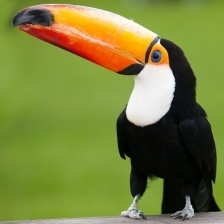

In [23]:
predict('/content/drive/My Drive/IA Project/Data/Test/TOUCHAN/3.jpg')
from IPython.display import Image 
Image('/content/drive/My Drive/IA Project/Data/Test/TOUCHAN/3.jpg')

La imagen corresponde a un WHITE TAILED TROPIC


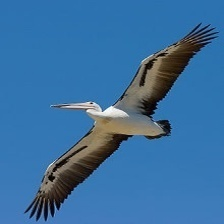

In [12]:
predict('/content/drive/My Drive/IA Project/Data/Test/PELICAN/2.jpg')
from IPython.display import Image 
Image('/content/drive/My Drive/IA Project/Data/Test/PELICAN/2.jpg')

La imagen corresponde a un WHITE TAILED TROPIC


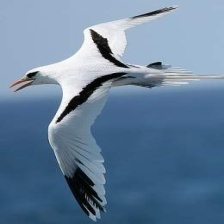

In [13]:
predict('/content/drive/My Drive/IA Project/Data/Test/WHITE TAILED TROPIC/1.jpg')
from IPython.display import Image 
Image('/content/drive/My Drive/IA Project/Data/Test/WHITE TAILED TROPIC/1.jpg')

La imagen corresponde a un BARN OWL


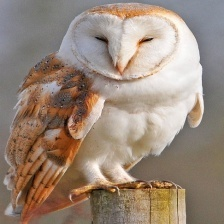

In [16]:
predict('/content/drive/My Drive/IA Project/Data/Test/BARN OWL/5.jpg')
from IPython.display import Image 
Image('/content/drive/My Drive/IA Project/Data/Test/BARN OWL/5.jpg')